<H1>Libraries<H1/>

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
import statsmodels.api as sm


#part A

In [ ]:
btc = yf.download("BTC-USD", interval='1d', start='2022-5-1', end='2023-6-1')["Close"]

[*********************100%***********************]  1 of 1 completed


In [ ]:
btc = pd.DataFrame(btc, columns= ["Close"])

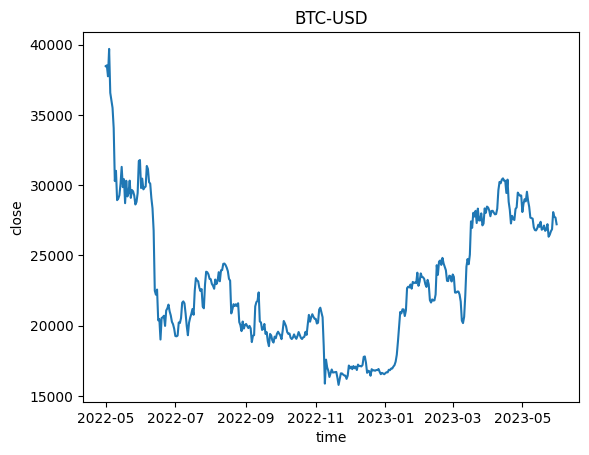

In [ ]:
plt.plot(btc)
plt.title("BTC-USD")
plt.xlabel("time")
plt.ylabel("close")
plt.show()

In [ ]:
sma = btc.rolling(window=30).mean()
std = btc.rolling(window=30).std()

<Figure size 640x480 with 0 Axes>

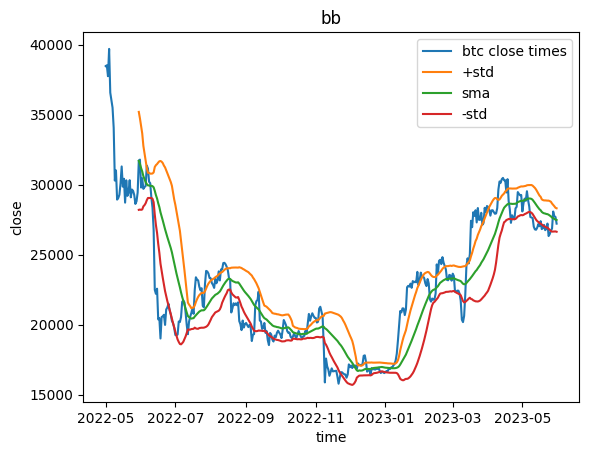

In [ ]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.plot(btc, label='btc close times')
ax.plot(sma + std, label='+std')
ax.plot(sma, label='sma')
ax.plot(sma - std, label='-std')
ax.set_xlabel('time')
ax.set_ylabel('close')
ax.set_title("bb")
ax.legend()

if close data is more than sma+std => open sell(1)

if close data comes back to the sma => close sell(-1)

if close data is less than sma-std => open buy(2)

if close data comes back to the sma => close buy(-2)

In [ ]:
def simpleBollingerBands(data, sma, std, initial=10000):
  haveOpenPosition = False
  lastOpenPosition = ""
  start, end = 0, 0
  buy = []
  closebuy = []
  sell = []
  closesell = []
  state = {"buy":[], "sell":[]}
  data["signal"] = 0
  numberOfCoin = 0
  capitalState=[initial]
  for i in range(len(data)):
    if haveOpenPosition:
      end = data["Close"][i]
      if lastOpenPosition=="buy" and data["Close"][i] >= sma["Close"][i]:
        data["signal"][i] = -2
        closebuy.append(data.index[i])
        state["buy"].append(end-start)
        initial = numberOfCoin*data["Close"][i]
        capitalState.append(initial)
        haveOpenPosition = False
      elif lastOpenPosition=="sell" and data["Close"][i] <= sma["Close"][i]:
        data["signal"][i] = -1
        closesell.append(data.index[i])
        state["sell"].append(start-end)
        initial = numberOfCoin*data["Close"][i]
        capitalState.append(initial)
        haveOpenPosition = False
    else:
      if data["Close"][i] > sma["Close"][i] + std["Close"][i]:
        start = data["Close"][i]
        lastOpenPosition = "sell"
        haveOpenPosition = True
        data["signal"][i] = 1
        sell.append(data.index[i])
        numberOfCoin = initial/data["Close"][i]
        initial = 0
      elif data["Close"][i] < sma["Close"][i] - std["Close"][i]:
        start = data["Close"][i]
        lastOpenPosition = "buy"
        haveOpenPosition = True
        data["signal"][i] = 2
        buy.append(data.index[i])
        numberOfCoin = initial/data["Close"][i]
        initial = 0
  return [buy, closebuy, sell, closesell], state, initial, capitalState

<h6>calculate sharpe ratio</h6>

In [ ]:
def sharpe_ratio(input_data):
  mean = 0
  for i in range(len(input_data)):
    mean += input_data[i]
  maen = mean/(len(input_data))
  sum = 0
  for i in range(len(input_data)):
    sum += ((mean-input_data[i])**2)
  std = np.sqrt(sum/len(input_data))
  sharpe_ratio = (mean-5)/std
  return sharpe_ratio

In [ ]:
[buy, closebuy, sell, closesell], state, initial, capitalState = simpleBollingerBands(btc, sma, std)

<ipython-input-247-f59f86414208>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["signal"][i] = 1
<ipython-input-247-f59f86414208>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["signal"][i] = -1
<ipython-input-247-f59f86414208>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["signal"][i] = 2
<ipython-input-247-f59f86414208>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

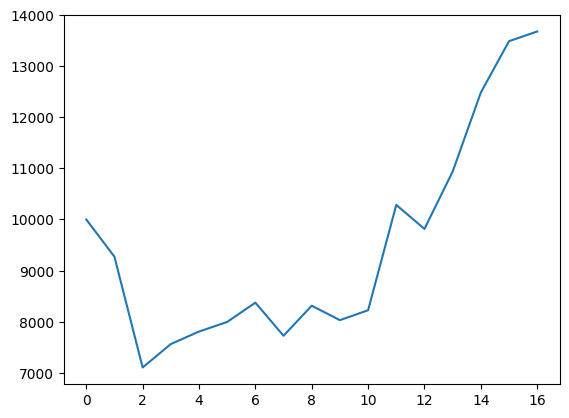

In [ ]:
plt.plot(capitalState)

In [ ]:
print("compound return = ",(initial / 10000)**(1/1) - 1)

compound return =  0.36785705006035174


In [ ]:
print("percentage return = ",(initial-10000)/10000)

percentage return =  0.3678570500603517


In [ ]:
prof_loss = []
for i in range(1, len(capitalState)):
  prof_loss.append(capitalState[i]-capitalState[i-1])

In [ ]:
sr = sharpe_ratio(prof_loss)
print("sharpe ratio = ", sr)

sharpe ratio =  1.0258708976307607


In [ ]:
print([buy, closebuy, sell, closesell])

[[Timestamp('2022-06-11 00:00:00'), Timestamp('2022-07-12 00:00:00'), Timestamp('2022-08-19 00:00:00'), Timestamp('2022-09-18 00:00:00'), Timestamp('2022-11-09 00:00:00'), Timestamp('2022-12-28 00:00:00'), Timestamp('2023-03-08 00:00:00'), Timestamp('2023-04-21 00:00:00'), Timestamp('2023-05-08 00:00:00')], [Timestamp('2022-07-08 00:00:00'), Timestamp('2022-07-14 00:00:00'), Timestamp('2022-09-09 00:00:00'), Timestamp('2022-10-04 00:00:00'), Timestamp('2022-12-06 00:00:00'), Timestamp('2023-01-06 00:00:00'), Timestamp('2023-03-13 00:00:00'), Timestamp('2023-04-27 00:00:00'), Timestamp('2023-05-28 00:00:00')], [Timestamp('2022-06-06 00:00:00'), Timestamp('2022-07-18 00:00:00'), Timestamp('2022-10-25 00:00:00'), Timestamp('2022-12-08 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-02-15 00:00:00'), Timestamp('2023-03-14 00:00:00')], [Timestamp('2022-06-10 00:00:00'), Timestamp('2022-08-18 00:00:00'), Timestamp('2022-11-08 00:00:00'), Timestamp('2022-12-16 00:00:00'), Timest

<BarContainer object of 9 artists>

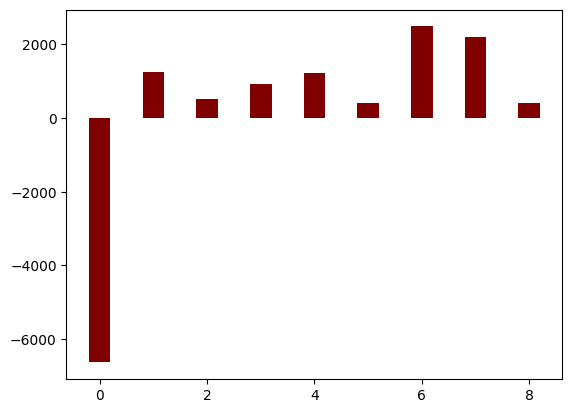

In [ ]:
# plt.plot(state["buy"])
x = []
for i in range(len(state["buy"])):
  x.append(i)
plt.bar(x, state["buy"], color ='maroon',
        width = 0.4)

<BarContainer object of 7 artists>

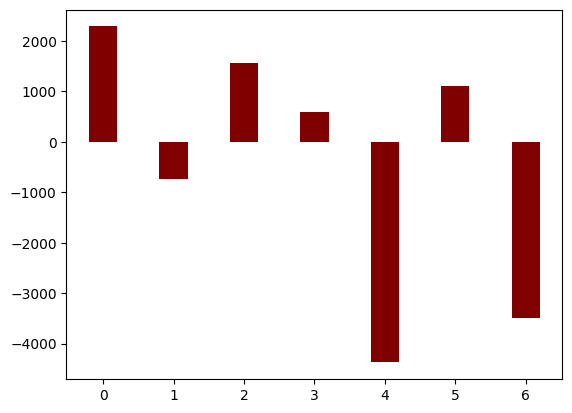

In [ ]:
x = []
for i in range(len(state["sell"])):
  x.append(i)
plt.bar(x, state["sell"], color ='maroon',
        width = 0.4)

In [ ]:
np.sum(np.array(state["sell"]))

-3062.55078125

In [ ]:
np.sum(np.array(state["buy"]))

2713.0732421875

<Figure size 640x480 with 0 Axes>

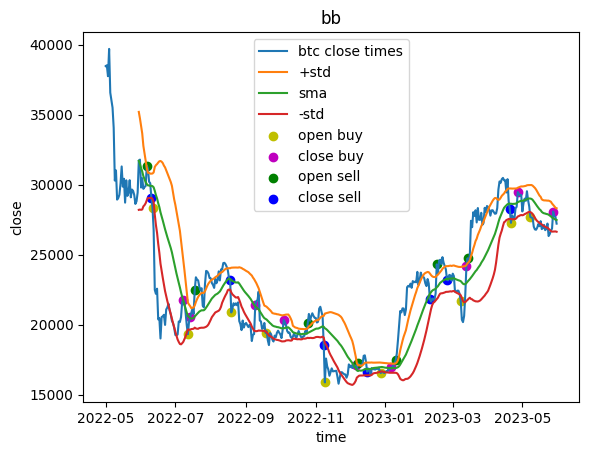

In [ ]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.plot(btc["Close"], label='btc close times')
ax.plot(sma + std, label='+std')
ax.plot(sma, label='sma')
ax.plot(sma - std, label='-std')

i = 0
for dot in buy:
  if i==0:
    plt.scatter(dot, btc["Close"][dot], color='y', label="open buy")
    i+=1
  else:
    plt.scatter(dot, btc["Close"][dot], color='y')
i = 0
for dot in closebuy:
  if i==0:
    plt.scatter(dot, btc["Close"][dot], color='m', label="close buy")
    i+=1
  else:
    plt.scatter(dot, btc["Close"][dot], color='m')

i = 0
for dot in sell:
  if i==0:
    plt.scatter(dot, btc["Close"][dot], color='g', label="open sell")
    i+=1
  else:
    plt.scatter(dot, btc["Close"][dot], color='g')

i = 0
for dot in closesell:
  if i==0:
    plt.scatter(dot, btc["Close"][dot], color='b', label="close sell")
    i+=1
  else:
    plt.scatter(dot, btc["Close"][dot], color='b')


ax.set_xlabel('time')
ax.set_ylabel('close')
ax.set_title("bb")
ax.legend()

#Part B

<Figure size 640x480 with 0 Axes>

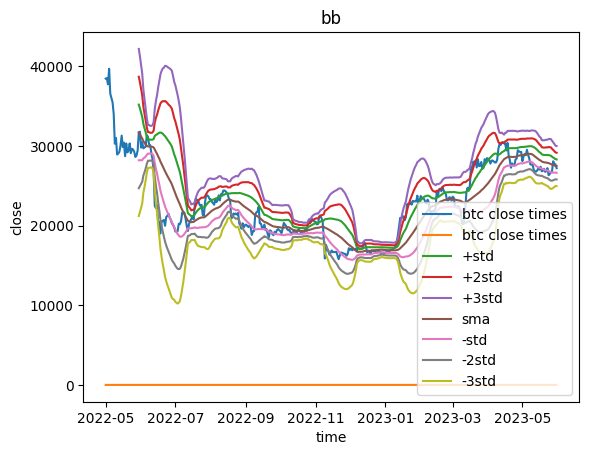

In [ ]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.plot(btc, label='btc close times')
ax.plot(sma + std, label='+std')
ax.plot(sma + 2*std, label='+2std')
ax.plot(sma + 3*std, label='+3std')
ax.plot(sma, label='sma')
ax.plot(sma - std, label='-std')
ax.plot(sma - 2*std, label='-2std')
ax.plot(sma - 3*std, label='-3std')
ax.set_xlabel('time')
ax.set_ylabel('close')
ax.set_title("bb")
ax.legend()

if close data is more than sma+std => open sell(1)

if close data comes back to the sma => close sell(-1)

if close data is less than sma-std => open buy(2)

if close data comes back to the sma => close buy(-2)

In [ ]:
def bollingerBandsWithScalingIn(data, sma, std, initial=10000):
  haveOpenPosition = False
  lastOpenPosition = ""
  numberOfCoin = 0
  capitalState=[initial]
  last=-1
  for i in range(len(data)):
    if numberOfCoin>0:
      # we have to close buy position
      if lastOpenPosition=="buy" and data["Close"][i] >= sma["Close"][i]:
        initial += (numberOfCoin*data["Close"][i])
        capitalState.append(initial)
        haveOpenPosition = False
        numberOfCoin = 0
        last = -1
        print(initial, "close buy")
      elif lastOpenPosition=="sell" and data["Close"][i] <= sma["Close"][i]:
        initial += (numberOfCoin*data["Close"][i])
        capitalState.append(initial)
        haveOpenPosition = False
        numberOfCoin = 0
        last = -1
        print(initial, "close sell")
    if(1==1):
      # cross with third upper band
      if data["Close"][i] > sma["Close"][i] + 3*std["Close"][i] and last!=3:
        lastOpenPosition = "sell"
        haveOpenPosition = True
        numberOfCoin += ((initial)/data["Close"][i])
        initial = 0
        last = 3
        print(initial, "open sell 3")
      # cross with second upper band
      elif data["Close"][i] > sma["Close"][i] + 2*std["Close"][i] and last!=2 and last!=3:
        lastOpenPosition = "sell"
        haveOpenPosition = True
        numberOfCoin += ((initial/2)/data["Close"][i])
        initial -= (initial/2)
        last = 2
        print(initial, "open sell 2")
      # cross with first upper band
      elif data["Close"][i] > sma["Close"][i] + std["Close"][i] and last!=1 and last!=2 and last!=3:
        lastOpenPosition = "sell"
        haveOpenPosition = True
        numberOfCoin += ((initial/3)/data["Close"][i])
        initial -= (initial/3)
        last = 1
        print(initial, "open sell 1")

      # cross with third lower band
      elif data["Close"][i] < sma["Close"][i] - 3*std["Close"][i] and last!=3:
        lastOpenPosition = "buy"
        haveOpenPosition = True
        numberOfCoin += ((initial)/data["Close"][i])
        initial -= (initial)
        last = 3
        print(initial, "open buy 3")
      # cross with second lower band
      elif data["Close"][i] < sma["Close"][i] - 2*std["Close"][i] and last!=2 and last!=3:
        lastOpenPosition = "buy"
        haveOpenPosition = True
        numberOfCoin += ((initial/2)/data["Close"][i])
        initial -= (initial/2)
        last = 2
        print(initial, "open buy 2")
      # cross with first lower band
      elif data["Close"][i] < sma["Close"][i] - std["Close"][i] and last!=1 and last!=2 and last!=3:
        lastOpenPosition = "buy"
        haveOpenPosition = True
        numberOfCoin += ((initial/3)/data["Close"][i])
        initial -= (initial/3)
        last = 1
        print(initial, "open buy 1")
  return initial, capitalState

In [ ]:
initial, capitalState = bollingerBandsWithScalingIn(btc, sma, std)

6666.666666666666 open sell 1
9757.005822018276 close sell
6504.670548012184 open buy 1
3252.335274006092 open buy 2
0.0 open buy 3
8275.895186430565 close buy
5517.263457620376 open buy 1
8453.771743262581 close buy
4226.885871631291 open sell 2
8590.44322162637 close sell
4295.221610813185 open buy 2
8694.050763798834 close buy
5796.033842532555 open buy 1
8830.947178609851 close buy
4415.473589304926 open sell 2
0 open sell 3
8015.485704066221 close sell
5343.657136044147 open buy 1
0.0 open buy 3
8213.00188634173 close buy
5475.334590894487 open sell 1
2737.6672954472433 open sell 2
7945.344301645009 close sell
5296.896201096673 open buy 1
8009.248620770404 close buy
5339.499080513602 open sell 1
2669.749540256801 open sell 2
0 open sell 3
9673.88163116985 close sell
6449.2544207799 open sell 1
3224.62721038995 open sell 2
9347.166328097559 close sell
6231.444218731705 open buy 1
3115.7221093658527 open buy 2
10289.588118855783 close buy
6859.725412570522 open sell 1
3429.862706285

In [ ]:
print(initial)

11222.13707222766


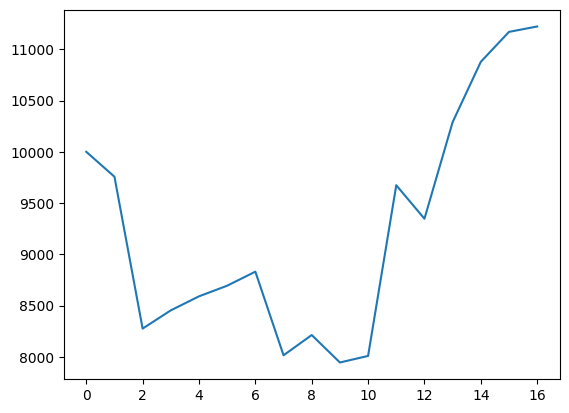

In [ ]:
plt.plot(capitalState)

In [ ]:
capitalState

[10000,
 9757.005822018276,
 8275.895186430565,
 8453.771743262581,
 8590.44322162637,
 8694.050763798834,
 8830.947178609851,
 8015.485704066221,
 8213.00188634173,
 7945.344301645009,
 8009.248620770404,
 9673.88163116985,
 9347.166328097559,
 10289.588118855783,
 10877.497668172571,
 11169.521505647725,
 11222.13707222766]

In [ ]:
print("compound return = ",(initial / 10000)**(1/1) - 1)

compound return =  0.12221370722276603


In [ ]:
print("percentage return = ",(initial-10000)/10000)

percentage return =  0.12221370722276606


In [ ]:
prof_loss = []
for i in range(1, len(capitalState)):
  prof_loss.append(capitalState[i]-capitalState[i-1])

In [ ]:
prof_loss

[-242.99417798172362,
 -1481.110635587711,
 177.87655683201592,
 136.671478363789,
 103.60754217246358,
 136.89641481101717,
 -815.4614745436302,
 197.51618227550898,
 -267.65758469672073,
 63.90431912539498,
 1664.633010399446,
 -326.71530307229114,
 942.4217907582242,
 587.9095493167879,
 292.0238374751534,
 52.61556657993606]

In [ ]:
sr = sharpe_ratio(prof_loss)
print("sharpe ratio = ", sr)

sharpe ratio =  0.9164351775839378


#part C

In [ ]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
def get_2_symbols(first_symbol, second_symbol):
  df = yf.download(first_symbol, start='2022-05-01', end='2023-06-01', actions='inline')
  first = df['Adj Close']
  df = yf.download(second_symbol, start='2022-05-01', end='2023-06-01', actions='inline')
  second = df['Adj Close']
  return [first, second, first_symbol+"&"+second_symbol]

In [ ]:
def create_new_time_series(x, y):
    #make sure DataFrames are the same length
    min_date = max(df.dropna().index[0] for df in [y, x])
    max_date = min(df.dropna().index[-1] for df in [y, x])
    y = y[(y.index>= min_date) & (y.index <= max_date)]
    x = x[(x.index >= min_date) & (x.index <= max_date)]
    df1 = pd.DataFrame({'y':y,'x':x})
    est = sm.OLS(df1.y,df1.x)
    est = est.fit()
    df1['hr'] = -est.params[0]
    df1['spread'] = df1.y + (df1.x * df1.hr)
    return df1

1: PLD AND MSCI

In [ ]:
x, y, names = get_2_symbols("PLD", "MSCI")
new_df = create_new_time_series(x, y)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
new_df = pd.DataFrame(new_df, columns= ["spread"])

In [ ]:
new_df = new_df.rename({'spread': 'Close'}, axis='columns')

In [ ]:
sma = new_df.rolling(window=30).mean()
std = new_df.rolling(window=30).std()

In [ ]:
[buy, closebuy, sell, closesell], state, initial, capitalState = simpleBollingerBands(new_df, sma, std)

<ipython-input-247-f59f86414208>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["signal"][i] = 1
<ipython-input-247-f59f86414208>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["signal"][i] = -1
<ipython-input-247-f59f86414208>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["signal"][i] = 2
<ipython-input-247-f59f86414208>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [ ]:
print(capitalState)

[10000, 18631.566926008785, 14001.074356921716, 11223.582894702668, 11533.651788605268, -2184.401695479344, 5987.5101062234735, 7718.569611122372, 6736.522396875912, 11165.177579731557, 7927.36353084012, 8043.130591266972, 13762.179603418921]


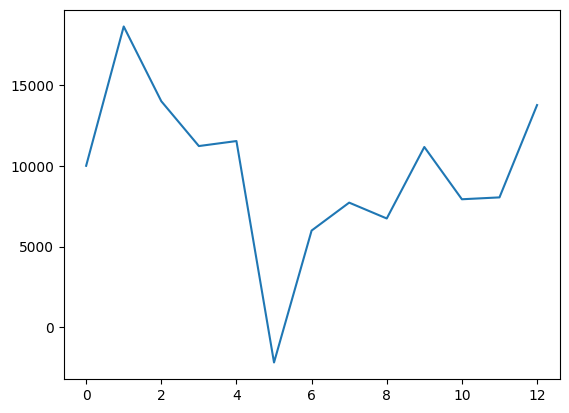

In [ ]:
plt.plot(capitalState)

In [ ]:
print("compound return = ",(capitalState[-1] / 10000)**(1/1) - 1)

compound return =  0.37621796034189203


In [ ]:
print("percentage return = ",(capitalState[-1]-10000)/10000)

percentage return =  0.3762179603418921


In [ ]:
prof_loss = []
for i in range(1, len(capitalState)):
  prof_loss.append(capitalState[i]-capitalState[i-1])

In [ ]:
sr = sharpe_ratio(prof_loss)
print("sharpe ratio = ", sr)

sharpe ratio =  0.5465701989018491


In [ ]:
initial, capitalState = bollingerBandsWithScalingIn(new_df, sma, std)

6666.666666666666 open sell 1
3333.333333333333 open buy 2
0 open sell 3


In [ ]:
print(capitalState)

[10000]


In [ ]:
print("compound return = ",(capitalState[-1] / 10000)**(1/1) - 1)

compound return =  0.0


In [ ]:
print("percentage return = ",(capitalState[-1]-10000)/10000)

percentage return =  0.0


In [ ]:
prof_loss = []
for i in range(1, len(capitalState)):
  prof_loss.append(capitalState[i]-capitalState[i-1])

In [ ]:
try:
  sr = sharpe_ratio(prof_loss)
  print("sharpe ratio = ", sr)
except:
  print("no data")

no data


2: STE AND CZR

In [ ]:
x, y, names = get_2_symbols("STE", "CZR")
new_df = create_new_time_series(x, y)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
new_df = pd.DataFrame(new_df, columns= ["spread"])

In [ ]:
new_df = new_df.rename({'spread': 'Close'}, axis='columns')

In [ ]:
sma = new_df.rolling(window=30).mean()
std = new_df.rolling(window=30).std()

In [ ]:
[buy, closebuy, sell, closesell], state, initial, capitalState = simpleBollingerBands(new_df, sma, std)

<ipython-input-247-f59f86414208>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["signal"][i] = 2
<ipython-input-247-f59f86414208>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["signal"][i] = -2
<ipython-input-247-f59f86414208>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["signal"][i] = 1
<ipython-input-247-f59f86414208>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [ ]:
print(capitalState)

[10000, 5753.412371497054, 4125.073979961379, 4005.5954098450916, -7664.024150556627, -3981.2583014798465, -50729.48813668396, -21433.46648957177, -36360.64315444504, -9647.179799317411]


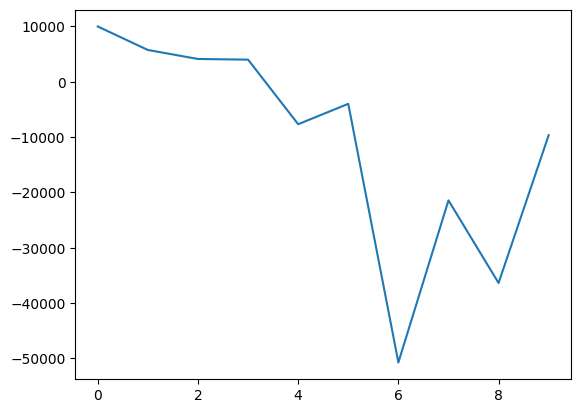

In [ ]:
plt.plot(capitalState)

In [ ]:
print("compound return = ",(capitalState[-1] / 10000)**(1/1) - 1)

compound return =  -1.9647179799317411


In [ ]:
print("percentage return = ",(capitalState[-1]-10000)/10000)

percentage return =  -1.9647179799317411


In [ ]:
prof_loss = []
for i in range(1, len(capitalState)):
  prof_loss.append(capitalState[i]-capitalState[i-1])

In [ ]:
sr = sharpe_ratio(prof_loss)
print("sharpe ratio = ", sr)

sharpe ratio =  -0.712203426705009


In [ ]:
initial, capitalState = bollingerBandsWithScalingIn(new_df, sma, std)

6666.666666666666 open buy 1
3333.333333333333 open sell 2
0 open sell 3
-1159.100084020134 close sell
-772.733389346756 open sell 1
-386.366694673378 open buy 2
0.0 open buy 3


In [ ]:
print(capitalState)

[10000, -1159.100084020134]


In [ ]:
print("compound return = ",(capitalState[-1] / 10000)**(1/1) - 1)

compound return =  -1.1159100084020135


In [ ]:
print("percentage return = ",(capitalState[-1]-10000)/10000)

percentage return =  -1.1159100084020135


In [ ]:
prof_loss = []
for i in range(1, len(capitalState)):
  prof_loss.append(capitalState[i]-capitalState[i-1])

In [ ]:
try:
  sr = sharpe_ratio(prof_loss)
  print("sharpe ratio = ", sr)
except:
  print("no data")

sharpe ratio =  -inf


<ipython-input-248-6bfdf74ae74c>:10: RuntimeWarning: divide by zero encountered in double_scalars
  sharpe_ratio = (mean-5)/std


3: UNP AND AEE

In [ ]:
x, y, names = get_2_symbols("UNP", "AEE")
new_df = create_new_time_series(x, y)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
new_df = pd.DataFrame(new_df, columns= ["spread"])

In [ ]:
new_df = new_df.rename({'spread': 'Close'}, axis='columns')

In [ ]:
sma = new_df.rolling(window=30).mean()
std = new_df.rolling(window=30).std()

In [ ]:
[buy, closebuy, sell, closesell], state, initial, capitalState = simpleBollingerBands(new_df, sma, std)

<ipython-input-247-f59f86414208>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["signal"][i] = 2
<ipython-input-247-f59f86414208>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["signal"][i] = -2
<ipython-input-247-f59f86414208>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["signal"][i] = 1
<ipython-input-247-f59f86414208>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [ ]:
print(capitalState)

[10000, 1233.760769902604, -1726.475325960522, -380.810367549464, -262.78985105488204, -577.2365727762163, -23312.83688285072, -4079.479642324894, -987.72806281559, -663.8949520145084, 1292.7655156214712, 170.82301339804155, -70.01862475496648, 179.10272806329934, -50.847615138165864, -56.867783983470176]


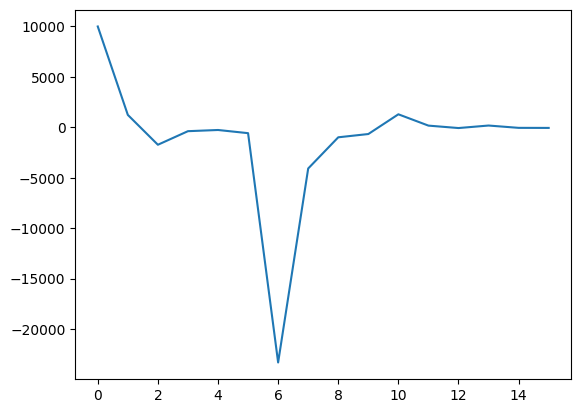

In [ ]:
plt.plot(capitalState)

In [ ]:
print("compound return = ",(capitalState[-1] / 10000)**(1/1) - 1)

compound return =  -1.005686778398347


In [ ]:
print("percentage return = ",(capitalState[-1]-10000)/10000)

percentage return =  -1.0056867783983472


In [ ]:
prof_loss = []
for i in range(1, len(capitalState)):
  prof_loss.append(capitalState[i]-capitalState[i-1])

In [ ]:
sr = sharpe_ratio(prof_loss)
print("sharpe ratio = ", sr)

sharpe ratio =  -0.8118432342060559


In [ ]:
initial, capitalState = bollingerBandsWithScalingIn(new_df, sma, std)

6666.666666666666 open buy 1
3333.333333333333 open buy 2
0 open sell 3


In [ ]:
print(capitalState)

[10000]


In [ ]:
print("compound return = ",(capitalState[-1] / 10000)**(1/1) - 1)

compound return =  0.0


In [ ]:
print("percentage return = ",(capitalState[-1]-10000)/10000)

percentage return =  0.0


In [ ]:
prof_loss = []
for i in range(1, len(capitalState)):
  prof_loss.append(capitalState[i]-capitalState[i-1])

In [ ]:
try:
  sr = sharpe_ratio(prof_loss)
  print("sharpe ratio = ", sr)
except:
  print("no data")

no data
